In [36]:
# This code cell should be run first. It imports all of the libraries used in the study. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.graphics.gofplots as statmod
import keras as kr
import sklearn.preprocessing as pre
import sklearn.decomposition as dec
import sklearn.model_selection as mod

# 1. Introduction

I work for a major multi-national company which is planning to move its corporate headquarters to Boston. This would require the relocation of upwards of 200 employees to the city.

The first choice location is the Financial District by the Charles river, but senior management have raised concerns that house prices are more expensive by the Charles river than an alternate location in the suburbs.

I have been tasked with the goal of investigating if there is a statistically significant difference in house prices between houses near the Charles river and those that are not. I am to use the **Boston House Price Dataset.** to investigate the question.

Firstly, i will look at research and up to date information in the media to attempt to construct a **hypothesis** as to what answer the data analysis may provide. 

Secondly, i will introduce the **Boston House Price Dataset.** The dataset contains a lot of data and i will isolate the variables relevant to testing my hypothesis. 

I will then use **descriptive statistics** and plotting to investigate if there is a difference in house prices. 

If the descriptive statistics suggest that there may be a difference, i will then use **inferential statistics** to discover if there is a statistically significant difference in median house prices between properties near and not near the Charles River. 

Finally, using all of the variables in the dataset, i will create a **neural network** using Keras to see if i can predict the median house price of a property based on the other variables in the dataset. 



## 1.1 Hypothesis

Harvard University, Massachusetts Institute of Technology, Boston University and Northeastern University are all located in this area beside or near the Charles River, making it one of the most desirable educational centres in the world. 

While this makes the area very desirable for attracting top talent to the company, it does suggest that house prices will be very high. 

Indeed, the *Boston Business Journal** states that 4 of the 5 districts responsible for the economically booming *Mass Miracle 2.0* are near the Charles river: The Back Bay, Kendall Square, Fenway and the Financial District (1).

*NeighborhoodX Boston* find that Beacon Hill, Fenway, and the Financial District (all bounding the river) are the most expensive districts in the city where property prices are over $1,000 per square foot (2). 

While the Financial District is a very attractive location for our business, properties on the Charles River will be significantly more expensive than alternatives. 

i will hypothesis the following: **Median house prices are significantly higher in properties that bound the Charles River.**

I will investigate the hypothesis by analysing the Boston House Prices Dataset which is introduced in the next section.



## 1.2 Boston House Prices Dataset 



The Boston House Prices Dataset is a famous dataset used in data analysis and machine learning and was introduced in the study *Hedonic Housing Prices and the Demand for Clean Air* by Harrison and Rubenfeld (3). 

The dataset can easily be loaded from *sklearn* 

In [37]:
# It is loaded following instructions here: https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

from sklearn.datasets import load_boston # dataset comes as part of sklearn. 
boston = load_boston() # The dataset is stored as the variable boston

In [38]:
print(boston.keys()) # The dataset is a dictionary. It includes the following keys.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [39]:
print(boston.DESCR) # The DESCR object gives a detailed overview of the variables in the dataset. 

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

As one can see above, there are 14 different variables in this dataset. Each **datapoint** represents a particular tract of Boston.   

In the **Descriptive** and **Inferential** sections of this study, we are interested in the Median value of owner-occupied homes in $1000s **MEDV** and the Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) **CHAS**  

CHAS is a **dichotomous binary categorical variable** denoting if the tract bounds the Charles river or not. **1** means that the property is in a tract which bounds the river. **0** means that the tract does not bound the river.  

MEDV is a **numeric variable** and denotes the Median value of owner-occupied homes in the tract.

CHAS is the **independent variable** that we expect will cause a change to the **dependent variable** MEDV. Based on my hypothesis, i would expect that tracts bounding the Charles River would have a higher median value. 

I have now isolated the two variables we will study. In the next section, i will attempt to describe them using plots and descriptive statistics.

From now on i will refer to the two variables by their names: **CHAS** and **MEDV** Furthermore, **near** the Charles river and **far** from the river will be used to describe the binary variable. 

In [40]:
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names) ## a Pandas dataframe is created with column names

In [41]:
bostonDF['MEDV'] = boston.target ## Another column is added containing the MEDV variable. 

In [42]:
bostonDF.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 2. Descriptive Statistics

The first step is to create a bar chart comparing the mean of MDV near and far from the river. 

Houses near the Charles River have a mean MDV of around 28000 and those far from the river have a mean of 22000



In [43]:
bostonFar = bostonDF.loc[bostonDF['CHAS'] == 0] ## divides the boston DF based on near or far from the Charles river 
bostonNear = bostonDF.loc[bostonDF['CHAS'] == 1]

In [44]:
np.round(bostonFar["MEDV"].mean()) ## mean of MDV Far from Charles River 

22.0

In [45]:
np.round(bostonNear["MEDV"].mean()) ## mean of MDV Near Charles River 

28.0

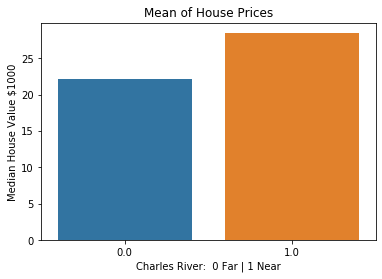

In [46]:
sns.barplot(y="MEDV", x="CHAS", ci=None, data=bostonDF)
plt.xlabel('Charles River:  0 Far | 1 Near')
plt.ylabel('Median House Value $1000')
plt.title("Mean of House Prices")
plt.show()


While the Bar Chart suggests that there is a significant difference in house prices near and far from the river, it is important to note that mean comparisons abstracts a lot of detail from the data itself and potentially gives a false impression. 

The Bar Chart does not tell us the spread of the data and the mean statistic can be negatively influenced by outliers or a skewed distribution (4). 

Exploratory Data Analysis (EDA) recommends that we observe the raw data first so that we can get a clearer picture of the dataset (5).

In *seaborn*, a swarmplot is a useful graph as it plots each datapoint allowing us to see the size and distribution of the dataset and if there are any outliers.


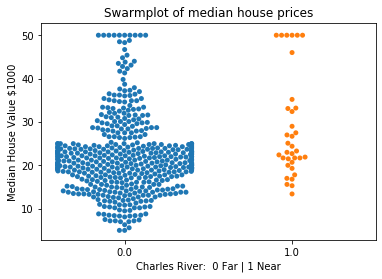

In [47]:
sns.swarmplot(x="CHAS", y="MEDV", data=bostonDF)
plt.xlabel('Charles River:  0 Far | 1 Near')
plt.ylabel('Median House Value $1000')
plt.title("Swarmplot of median house prices")
plt.show()

The swarmplot gives a much more nuanced picture of the dataset. There are many more tracts far from the river than those that bound it.The Near variable has a large group of tracts clustered at the €50000 level, then a big gap to the other datapoints which are similar to the Far datapoints. On the other hand, the large majority of Far datapoints are below the €25000 figure. 

Tuckey (6) suggests that the **Five Number Summary** is a more robust set of summary statistics to represent a dataset than the mean. It can be plotted using a boxplot. The end of each whisker represents the **minimum** and **maximum** value. The **inter quartile range** (IQR) is the box and contains the middle 50% of the data. The line inside the box is the **median**; the middle value in the dataset. Any points outside of the boxplot are **outliers**. 

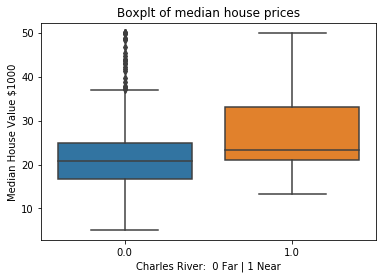

In [48]:
sns.boxplot(x="CHAS", y="MEDV", data=bostonDF)
plt.xlabel('Charles River:  0 Far | 1 Near')
plt.ylabel('Median House Value $1000')
plt.title("Boxplt of median house prices")
plt.show()

The boxplot above shows that, though they overlap, the **IQR** of both datasets seem quite distinct. The Far dataset also appears to have some extreme high values **outliers**.

Overall, the **Descriptive Statistics** suggests that there may be a difference in median house houses depending on proximity to the Charles river. In the next section, i will use **inferential statistics** to see if this difference is statistically significant.  

# 3. Inferential Statistics

We have two **independent groups** namely, tracts of land in Boston. **CHAS** the independent (explanatory) variable is a **nominal binary** variable: 1 for a tract near the Charles river, 0 if a tract is not. **MEDV** the **dependent** (outcome) variable is **numeric** representing the median house price of dwellings in the tract. In order to compare the mean of two independent groups, one would normally use an **independent t-test** (7).

An assumption of the independent t-test is that the numeric dependent variable is approximately normally distributed (8). A normally distributed variable will have a bell-shaped histogram. 

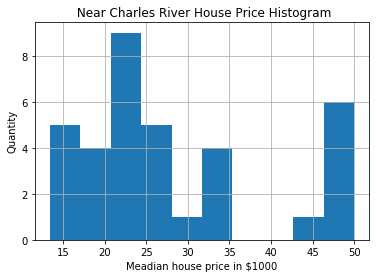

In [49]:
bostonNear["MEDV"].hist() # Pandas is used to create a histogram
plt.xlabel('Meadian house price in $1000')
plt.ylabel('Quantity')
plt.title(" Near Charles River House Price Histogram")
plt.show()

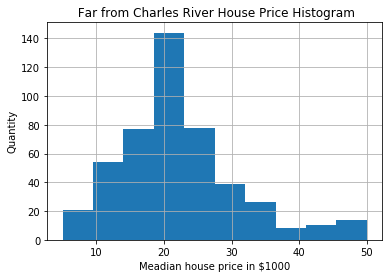

In [50]:
bostonFar["MEDV"].hist()
plt.xlabel('Meadian house price in $1000')
plt.ylabel('Quantity')
plt.title(" Far from Charles River House Price Histogram")
plt.show()

The histograms above show that the Near dataset is certainly not normally distributed. The Far dataset has more of a bell shape, but is strongly right-skewed. However, due to the unequal sizes of the dataset, a **qqplot** might make it easier to see their respective distributions. 


In a qqplot, a distribution is normally distributed if the data points closely follow the 45 degree line. 

One can see below that both distributions are of a similar shape and are both right-tailed (9). However, few datapoints lay on the line in either plot, so both the histograms and the qq plots suggest that the data is not normally distributed. 




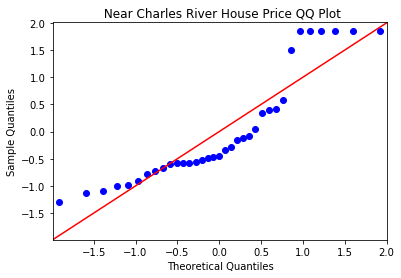

In [51]:
# qq plot should be referenced against 45 degree line: 
# https://www.itl.nist.gov/div898/handbook/eda/section3/qqplot.htm 
statmod.qqplot(bostonNear['MEDV'], fit=True, line='45')
plt.title(" Near Charles River House Price QQ Plot")
plt.show()

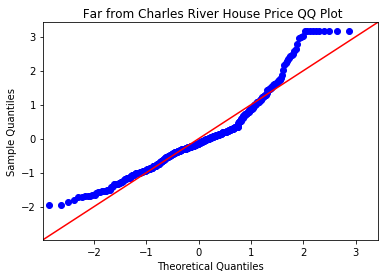

In [52]:
statmod.qqplot(bostonFar['MEDV'], fit=True, line='45')
plt.title(" Far from Charles River House Price QQ Plot")
plt.show()

Finally, a Shapiro-Wilks test for normality can be done on both datasets. As the P-Value is below 0.05 in both instances, we can reject the null hypotheses that they are normally distributed (10).  

In [53]:
stats.shapiro(bostonNear['MEDV'])

(0.8359232544898987, 0.00011230883683310822)

In [54]:
stats.shapiro(bostonFar['MEDV'])

(0.9282605051994324, 3.113930960958397e-14)

As the assumptions for the t-test have not been meet, i will use the non-parametric alternative: the **Mann-Whitney U Test** (7). As the distributions of the independent variables have a similar shape in the qqplots above, i will be able to use the test to compare the **Medians** of both groups (11). 

In [55]:
stats.mannwhitneyu(bostonFar['MEDV'], bostonNear['MEDV']) # Mann-Whitney U test performed using scipy

MannwhitneyuResult(statistic=5605.5, pvalue=0.0007908352505647487)

As the P-value is less than 0.05, we can reject the null hypothesis that both samples come from the same population. Therefore, the median house price in tracts bounding the Charles River are significantly higher than those not bounding the river (12). The difference is shown in the Bar Plot below. 

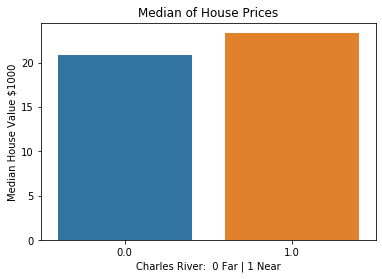

In [56]:
from numpy import median # import median from numpy and use it as the estimator for the barplot
sns.barplot(y="MEDV", x="CHAS", ci=None, estimator=median, data=bostonDF)
plt.xlabel('Charles River:  0 Far | 1 Near')
plt.ylabel('Median House Value $1000')
plt.title("Median of House Prices")
plt.show()


However, the median difference in house prices is quite small at €2,400. Also, as the swarmplot shows, while there is a cluster of very expensive houses in the tracts near the Charles River, most of the properties are of a similar price to other locations. Therefore, while houses are more expensive near the Charles river, there are many areas in these tracts which are not significantly more expensive. 

In [57]:
np.round(bostonNear["MEDV"].median() - bostonFar["MEDV"].median(), 1) * 1000

2400.0

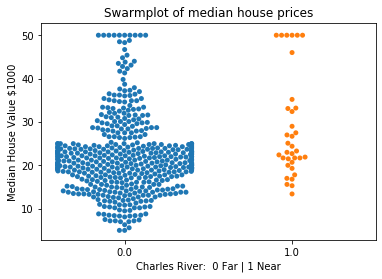

In [58]:
sns.swarmplot(x="CHAS", y="MEDV", data=bostonDF)
plt.xlabel('Charles River:  0 Far | 1 Near')
plt.ylabel('Median House Value $1000')
plt.title("Swarmplot of median house prices")
plt.show()

# 4. Neural Network

In [59]:
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [60]:
bostonDF['NEAR'] = (bostonDF['CHAS'] == 1).astype(np.int) # create two new columns where the value is 1 if true
bostonDF['FAR'] = (bostonDF['CHAS'] == 0).astype(np.int)


In [61]:
# https://stackoverflow.com/questions/22391433/count-the-frequency-that-a-value-occurs-in-a-dataframe-column
bostonDF['NEAR'].value_counts() # only 35 tracts are nnear the Charles river

0    471
1     35
Name: NEAR, dtype: int64

In [62]:
inputs = bostonDF[['CRIM', 'ZN', 'INDUS', 'NEAR', 'FAR', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
inputs.head()

,CRIM,ZN,INDUS,NEAR,FAR,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,1,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,1,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,1,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,1,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,1,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [64]:
outputs = bostonDF['MEDV']
outputs.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [66]:
# split the inputs to training and testing sets
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.2)

## 4.2 Pre-Processing 

Neural networks are generally more effective if the data is standardised before it is inputted into the network (13). Below, we will use feature selection decide our best inputs. We will also mitigate scaling and variance issues by whitening the inputs. 

#### Feature  Selection

There are 14 possible inputs in this dataset. If a model is too complex and includes too many irrelevant inputs, it may lead to overfitting  and reduce its overall accuracy (14)

I will use *sklearn*s *SelectKBest* function to select the the most 10 most powerful inputs. This function performs a Chi squared test to select the inputs which the output is most dependent on (15).

In [67]:
# The below is neccesery to get selectbest to work.
inputsBest = inputs.to_numpy() # converts back to numpy array
outputsBest = outputs.to_numpy() 

# https://discuss.analyticsvidhya.com/t/valueerror-unknown-label-type-unknown-for-logisticsregression-model/35610/4
# Had to convert type to int to stop error
inputsBest = inputsBest.astype('int')
outputsBest = outputsBest.astype('int')

In [68]:
# https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
# taken from above
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


bestresult = SelectKBest(score_func=chi2, k=10) # uses Chi squared and selects 10
fit = bestresult.fit(inputsBest,outputBest)

dfresult = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(inputs.columns)

featureresult = pd.concat([dfcolumns,dfresult],axis=1) 
featureresult.columns = ['Input','Result']  
print(featureresult.nlargest(10,'Result')) # prints the top 10 results


    Input        Result
10    TAX  15383.874566
1      ZN   6627.485470
0    CRIM   5668.678741
12      B   3417.157948
7     AGE   2507.919076
13  LSTAT   1509.815375
9     RAD   1495.398091
2   INDUS   1014.591009
8     DIS    213.788302
3    NEAR     53.053015


The 10 best predictor inputs are listed above. A new input dataframe is created which includes them below. The output is most dependent on these 10 variables. 

In [69]:
inputsN = bostonDF[['TAX', 'ZN', 'CRIM', 'B', 'AGE', 'LSTAT', 'RAD', 'INDUS', 'DIS', 'NEAR']]

#### Whitening


Scaling differences across inputs can reduce the efficacy of neural networks. Optimal inputs will be scaled be near a range of 0 to 1 (16). 

As you can see below. The TAX and B variables are measured in 100s, while others, like NEAR and CRIM are between 0 and 1. Therefore, it makes sense to scale the dataset. 

In [70]:
inputsN.head()

,TAX,ZN,CRIM,B,AGE,LSTAT,RAD,INDUS,DIS,NEAR
0,296.0,18.0,0.00632,396.90,65.2,4.98,1.0,2.31,4.0900,0
1,242.0,0.0,0.02731,396.90,78.9,9.14,2.0,7.07,4.9671,0
2,242.0,0.0,0.02729,392.83,61.1,4.03,2.0,7.07,4.9671,0
3,222.0,0.0,0.03237,394.63,45.8,2.94,3.0,2.18,6.0622,0
4,222.0,0.0,0.06905,396.90,54.2,5.33,3.0,2.18,6.0622,0


inputs to a neural network should also ideally have an approximate normal distribution. If they do not, they should be normalised or whitened (16). As you can see in the histograms below(Near is categorical so can be ignored), none of the numeric variables are normally distributed. Therefore, i will whiten the dataset using *sklearn*. This process will scale and normalise the data. 

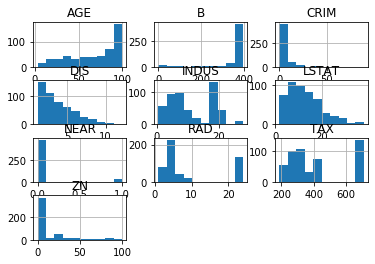

In [71]:
inputsN.hist()
plt.show()

In [72]:
# below i whiten the inputN dataset
pca = dec.PCA(n_components=10, whiten=True)
pca.fit(inputsN)

inputsNW = pd.DataFrame(pca.transform(inputsN), columns = inputsN.columns)

In [74]:
# The preprocessed dataset is split into traing and test sets 
# the outputs variable has not been changed
inputsNW_train, inputsNW_test, outputsNW_train, outputsNW_test = mod.train_test_split(inputsNW, outputs, test_size=0.2)

In [ ]:
m = kr.models.Sequential()
m.add(kr.layers.Dense(10, input_dim=8, activation="linear"))
m.add(kr.layers.Dense(30, activation="tanh"))
m.add(kr.layers.Dense(30, activation="tanh"))
m.add(kr.layers.Dense(30, activation="sigmoid"))
m.add(kr.layers.Dense(1, activation="linear"))
m.compile(loss="mean_squared_error", optimizer="sgd")

In [ ]:
m.fit(inputsNew, output, epochs=40, batch_size=15)

In [42]:
m = kr.models.Sequential()
m.add(kr.layers.Dense(10, input_dim=14, activation="linear"))
m.add(kr.layers.Dense(30, activation="tanh"))
m.add(kr.layers.Dense(30, activation="tanh"))
m.add(kr.layers.Dense(30, activation="sigmoid"))
m.add(kr.layers.Dense(1, activation="linear"))
m.compile(loss="mean_squared_error", optimizer="sgd", metrics=['accuracy'])

In [43]:
m.fit(inputs, output, epochs=400, batch_size=15)

Epoch 1/400
506/506 [==============================] - 0s 359us/step - loss: 114.7494 - accuracy: 0.0079
Epoch 2/400
506/506 [==============================] - 0s 59us/step - loss: 56.8505 - accuracy: 0.0099
Epoch 3/400
506/506 [==============================] - 0s 63us/step - loss: 64.6670 - accuracy: 0.0158
Epoch 4/400
506/506 [==============================] - 0s 63us/step - loss: 41.2891 - accuracy: 0.0138
Epoch 5/400
506/506 [==============================] - 0s 59us/step - loss: 34.8390 - accuracy: 0.0099
Epoch 6/400
506/506 [==============================] - 0s 59us/step - loss: 38.5250 - accuracy: 0.0198
Epoch 7/400
506/506 [==============================] - 0s 59us/step - loss: 36.2556 - accuracy: 0.0059
Epoch 8/400
506/506 [==============================] - 0s 59us/step - loss: 31.9271 - accuracy: 0.0059
Epoch 9/400
506/506 [==============================] - 0s 57us/step - loss: 24.6033 - accuracy: 0.0178
Epoch 10/400
506/506 [==============================] - 0s 59us/step - 

506/506 [==============================] - 0s 57us/step - loss: 54.1288 - accuracy: 0.0079
Epoch 158/400
506/506 [==============================] - 0s 53us/step - loss: 53.3093 - accuracy: 0.0138
Epoch 159/400
506/506 [==============================] - 0s 53us/step - loss: 42.8369 - accuracy: 0.0059
Epoch 160/400
506/506 [==============================] - 0s 61us/step - loss: 67.7547 - accuracy: 0.0138
Epoch 161/400
506/506 [==============================] - 0s 63us/step - loss: 62.3529 - accuracy: 0.0079
Epoch 162/400
506/506 [==============================] - 0s 55us/step - loss: 44.9556 - accuracy: 0.0119
Epoch 163/400
506/506 [==============================] - 0s 55us/step - loss: 58.8181 - accuracy: 0.0079
Epoch 164/400
506/506 [==============================] - 0s 53us/step - loss: 54.5999 - accuracy: 0.0059
Epoch 165/400
506/506 [==============================] - 0s 53us/step - loss: 61.3067 - accuracy: 0.0059
Epoch 166/400
506/506 [==============================] - 0s 55us/step

506/506 [==============================] - 0s 75us/step - loss: 57.6627 - accuracy: 0.0099
Epoch 313/400
506/506 [==============================] - 0s 77us/step - loss: 57.8206 - accuracy: 0.0079
Epoch 314/400
506/506 [==============================] - 0s 79us/step - loss: 57.8119 - accuracy: 0.0138
Epoch 315/400
506/506 [==============================] - 0s 73us/step - loss: 57.5373 - accuracy: 0.0138
Epoch 316/400
506/506 [==============================] - 0s 75us/step - loss: 57.4789 - accuracy: 0.0119
Epoch 317/400
506/506 [==============================] - 0s 71us/step - loss: 58.0047 - accuracy: 0.0138
Epoch 318/400
506/506 [==============================] - 0s 73us/step - loss: 58.0099 - accuracy: 0.0158
Epoch 319/400
506/506 [==============================] - 0s 71us/step - loss: 57.9503 - accuracy: 0.0158
Epoch 320/400
506/506 [==============================] - 0s 71us/step - loss: 57.6880 - accuracy: 0.0099
Epoch 321/400
506/506 [==============================] - 0s 77us/step

In [40]:
np.round(m.predict(inputs).T - output.as_matrix(), 1)


C:\Users\Dermot\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[  3.7,  -0.3,   0.4,  -0.4,  -2. ,  -3.8,  -2.3,  -9.4,  -2.7,
         -0.2,   2.6,   1.1,  -0.6,   0.6,   0.5,   1.3,   0.3,  -0.7,
          0.9,   1.3,   0.1,  -3.4,  -1.4,  -0.8,  -1.2,   3. ,  -0.9,
          1.8,  -0.7,  -3. ,   1.2,   1.6,   3.4,   0.7,   3.1,   2.8,
          1.6,   1.2,  -2.6,   1.9,   5.1,   5.1,   1.1,   0.6,   1. ,
          1.8,   0.9,   2.8,  -0.7,   0. ,   1.3,   0.8,   4.2,   1.1,
          0.1,   4. ,  -0.7,  -0.1,   1.3,   3.2,   0.8,   3.5,   0.8,
          1.3,  -5.6,   4. ,   4.5,   0.4,   3.3,   0.2,   2.6,   3.2,
          3.3,   2.2,   2.6,   1.5,   0.7,   0.4,  -0.5,   2.1,  -0.3,
          1.1,   0.3,   0.4,  -1.4,   0.8,  -1.4,   3.3,   3.5,   3.4,
          2.4,   2.8,   1.5,   1.6,   1.8,  -0.8,   3.4,   1.5,   0.4,
         -0.9,  -6.3,  -3.1,   6.8,  -0.1,  -1. ,  -0.7,  -2. ,  -1.2,
         -0.7,  -0.7,  -1.1,  -1.8,   0.7,   0.7,   1.8,   1.1,  -1.3,
          0.8,  -1. ,   0.2,  -1.1,  -0.5,  -1.3,  -0.8,  -0.2,  -1.6,
      

In [ ]:
bostonDF.describe()

There are too many variables for a readable pairwise plot, we will select some variables that may correlate with median house price

Dropped chas as it is categorical, not suitable for correlation analysis

In [ ]:
bostonPair = bostonDF.drop(['CHAS'], axis='columns')

In [ ]:
sns.pairplot(bostonPair)

In [ ]:
plt.scatter(x=bostonDF['MEDV'], y=bostonDF['LSTAT'])

In [ ]:
plt.scatter(x=bostonDF['MEDV'], y=bostonDF['PTRATIO'])

In [ ]:
plt.scatter(x=bostonDF['MEDV'], y=bostonDF['RM'])

In [ ]:
plt.scatter(x=bostonDF['MEDV'], y=bostonDF['CRIM'])

In [ ]:
plt.scatter(x=bostonDF['MEDV'], y=bostonDF['ZN'])

In [ ]:
sns.catplot(x="CHAS", y="MEDV", data=bostonDF)

In [ ]:
sns.boxplot(x="CHAS", y="MEDV", data=bostonDF)

In [ ]:
bostonFar = bostonDF.loc[bostonDF['CHAS'] == 0]
bostonNear = bostonDF.loc[bostonDF['CHAS'] == 1]

In [ ]:
sns.distplot(bostonFar['MEDV'])
sns.distplot(bostonNear['MEDV'])

In [ ]:
plt.scatter(x=bostonDF['MEDV'], y=bostonDF['LSTAT'])

T Test assumptions

1. Normality 

Show that they are largely normal

2. unequal sample sizes, should check for The Assumption of Homogeneity of Variance

In [ ]:
bostonNear['CHAS'].shape

In [ ]:
bostonFar['CHAS'].shape

In [ ]:
sns.distplot(bostonFar['MEDV'])


(1) https://www.bizjournals.com/boston/news/2017/07/21/5-boston-neighborhoods-driving-mass-miracle-2-0.html

(2) http://boston.neighborhoodx.com/lists/index?g=110

(3) http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.926.5532&rep=rep1&type=pdf

(4) https://www.abs.gov.au/websitedbs/a3121120.nsf/home/statistical+language+-+measures+of+central+tendency

(5) https://www.itl.nist.gov/div898/handbook/eda/section1/eda11.htm

(6) Tukey, J. W. Exploratory Data Analysis: Addison-Wesley, 1977.

(7) http://www.statstutor.ac.uk/resources/uploaded/tutorsquickguidetostatistics.pdf

(8) https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php

(9) http://www.ucd.ie/ecomodel/Resources/QQplots_WebVersion.html

(10) https://variation.com/wp-content/distribution_analyzer_help/hs141.htm

(11) https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php

(12) http://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_nonparametric/BS704_Nonparametric4.html

(13) https://scikit-learn.org/stable/modules/preprocessing.html

(14) https://machinelearningmastery.com/feature-selection-machine-learning-python/

(15) https://www.geeksforgeeks.org/chi-square-test-for-feature-selection-mathematical-explanation/

(16) https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/
